### codeneuro Python programming tutorial

Let's start by importing the packages that we want to use:
- numpy for computing with arrays
- pyplot for making plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Now let's load some data

In [3]:
data = np.load('data.npy')

and make a simple plot

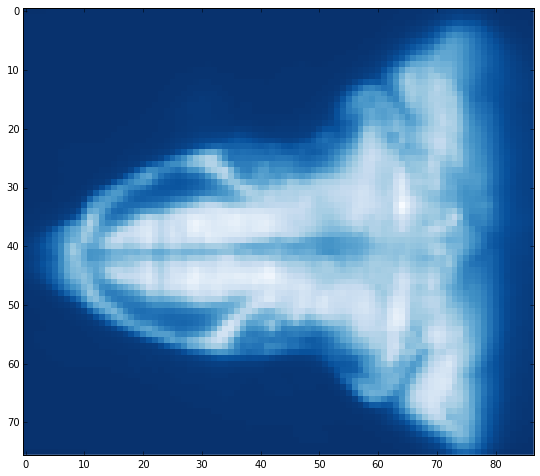

In [19]:
# get the average image
avg = np.mean(data, axis=3)

# take a max-projection through z
proj = np.amax(avg, axis=2)

# plot the image
plt.figure(figsize=(15,8))
plt.imshow(proj, cmap='Blues_r', interpolation='none');